<a href="https://colab.research.google.com/github/govardhan-06/practice-Notebooks/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

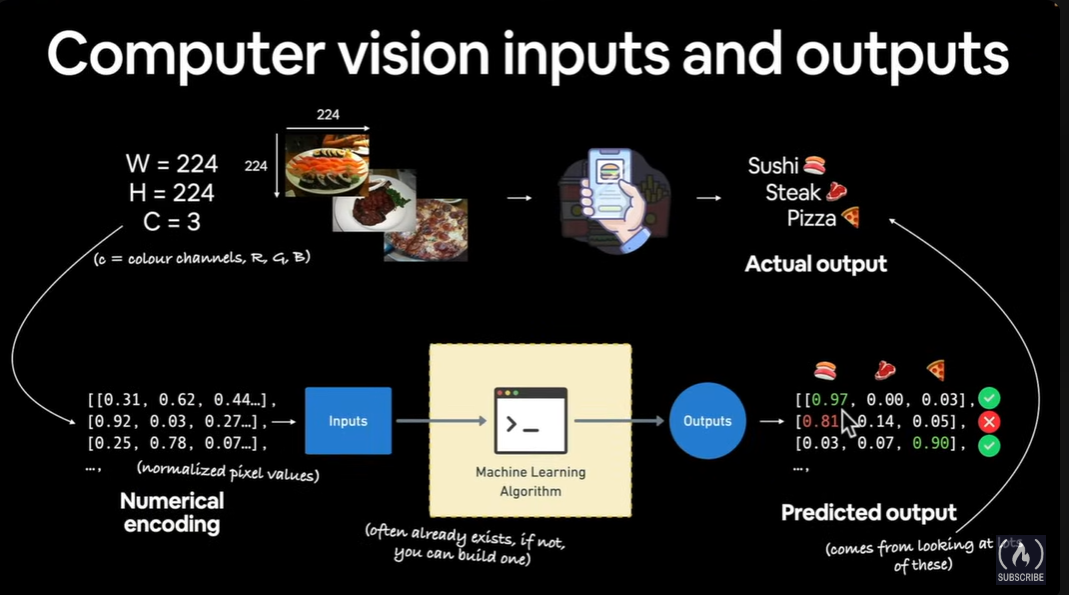

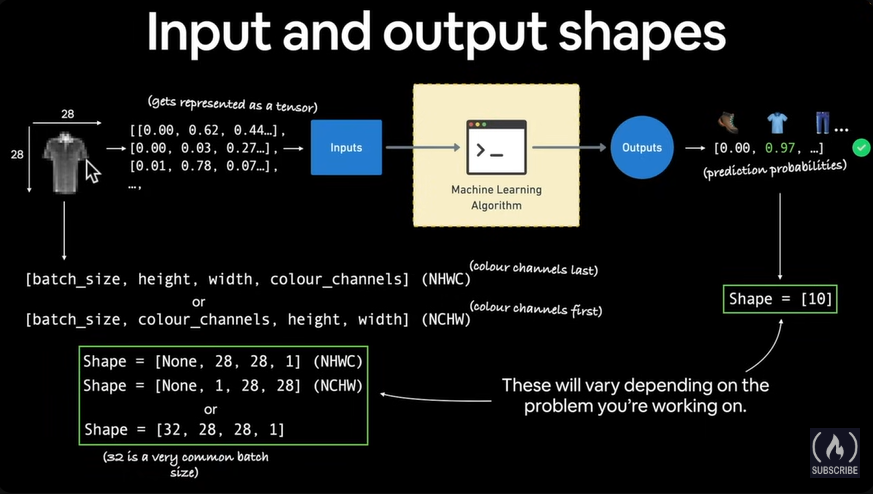

#### PyTorch Computer Vision Libraries

* `torchvision` - base library of pytorch computer vision
* `torchvision.datasets` - get datasets and data loading for computer vision
* `torchvision.models` - get pre-trained CV models
* `torchvision.transforms` - functions for manipulating your vision data for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create Python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


1. Getting a dataset

In [2]:
train_set=torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_set=torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15351460.76it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301385.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5557277.08it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15657923.85it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_set),len(test_set)

(60000, 10000)

In [14]:
class_names=train_set.classes

In [7]:
train_set.class_to_idx #Returns a dictionary

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image,label=train_set[0]

In [10]:
label

9

In [13]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

### Check the input and output of data

In [15]:
print(f"Image shape: {image.shape} -> [colour_channels,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [colour_channels,height,width]
Image label: Ankle boot


* PyTorch follows colour channels first policy for representing the images wherein other frameworks use colour channel last policy

### Visualizing our data

Image shape : torch.Size([1, 28, 28])


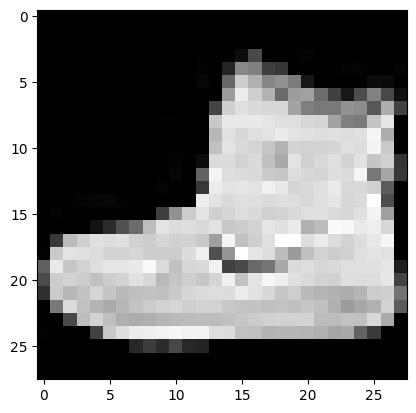

In [28]:
import matplotlib.pyplot as plt
image,label=train_set[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(),cmap='gray')

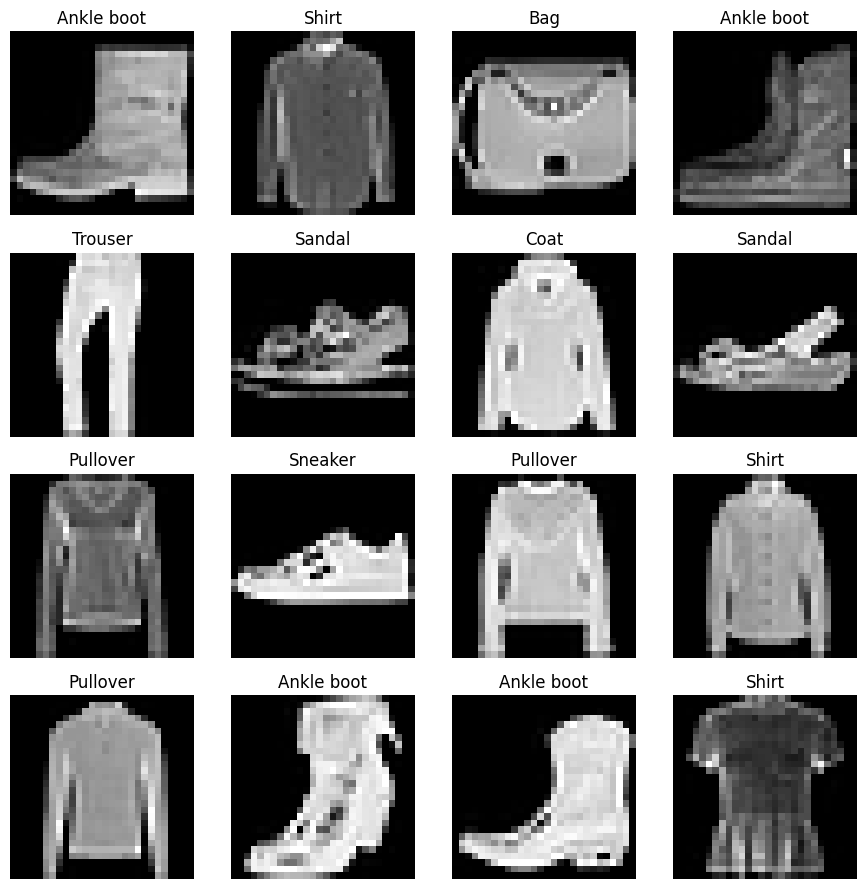

In [34]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_set), size=[1]).item()
    img, label = train_set[random_idx]
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()